In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
wine = pd.read_csv('Wine_Quality.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [8]:
y = wine['quality']
x = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol']]

# Plotting

C:\Users\Ashton\AppData\Local\Temp\ipykernel_16696\2955746309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['quality'])


<Axes: xlabel='quality', ylabel='Density'>

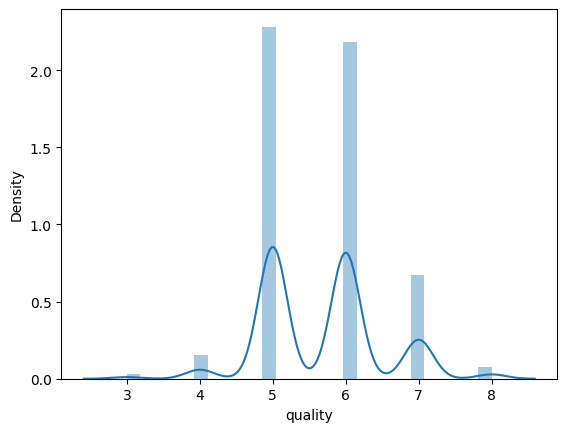

In [9]:
sns.distplot(wine['quality'])

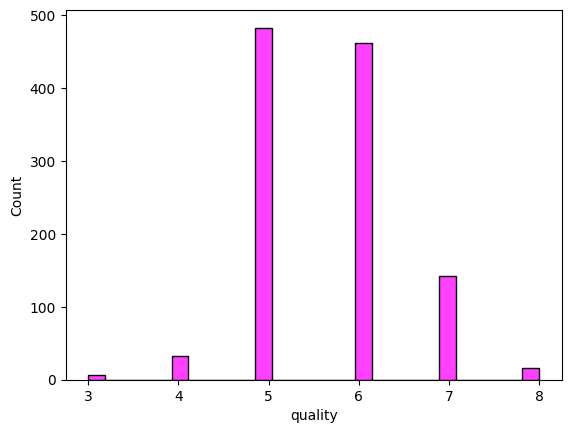

In [20]:
sns.histplot(wine['quality'], color = 'magenta')
plt.show()

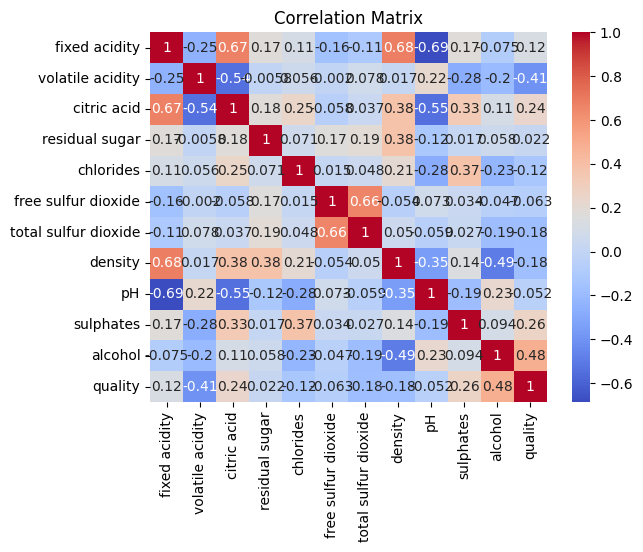

In [18]:
co_matrix = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol','quality']].corr()
sns.heatmap(co_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Training and Testing

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [34]:
model = LinearRegression()

In [35]:
model.fit(xtrain, ytrain)

LinearRegression()

In [36]:
model.coef_

array([ 5.95107935e-02, -1.15662682e+00, -2.40343156e-01,  1.03437642e-02,
       -1.43749509e+00,  2.77770451e-03, -2.35139561e-03, -3.94833680e+01,
       -2.25812507e-01,  8.61783889e-01,  2.92648569e-01])

In [37]:
pd.DataFrame(model.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,0.059511
volatile acidity,-1.156627
citric acid,-0.240343
residual sugar,0.010344
chlorides,-1.437495
free sulfur dioxide,0.002778
total sulfur dioxide,-0.002351
density,-39.483368
pH,-0.225813
sulphates,0.861784


In [38]:
predict = model.predict(xtest)

# Metrics

In [42]:
mse = mean_squared_error(ytest, predict)
mae = mean_absolute_error(ytest, predict)
r2 = r2_score(ytest, predict)

In [43]:
print("Mean Squared Error:", mse)
print("mean_absolute_error:",mae)
print("R-squared:", r2)

Mean Squared Error: 0.42593159230325023
mean_absolute_error: 0.4976628865097004
R-squared: 0.3335239412790254


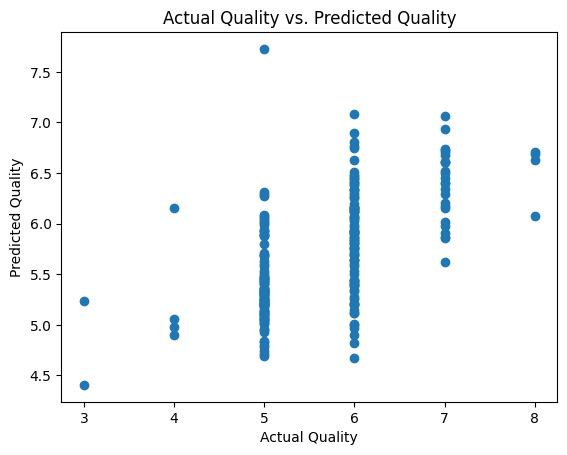

In [45]:
plt.scatter(ytest, predict)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual Quality vs. Predicted Quality")
plt.show()

In [32]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Prediction

In [47]:
new_data = [[8, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.92, 3.5, 0.65, 10.2]]
predicted_quality = model.predict(new_data)
print("Predicted Quality:", predicted_quality[0])

Predicted Quality: 8.688388264499416


C:\Users\Ashton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
